In [1]:
import tensorflow.keras as k
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import numpy as np
from data_util import *

## Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist()

x_train: (60000, 28, 28)
y_train: (60000, 10)
x_test: (10000, 28, 28)
y_test: (10000, 10)


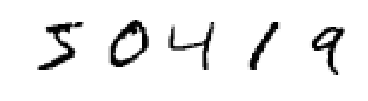

In [3]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
show_mnist(x_train[:5])

## Load Model

In [4]:
nn = k.models.load_model("models/classifier_without_bn.h5")
nn_bn = k.models.load_model("models/classifier_bn.h5")

In [5]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
output (Activation)          (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
nn_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

## Compare Models

In [7]:
def evaluate_acc(model):
    hists = []
    for i in range(10):
        noise_level = i / 10
        x_test_noise = sap_noise(x_test, noise_level)
        hist = model.evaluate(x_test_noise, y_test, verbose=0)
        title = "noise level:" + str(noise_level) + "\tAccuracy:" + str(hist[1])
        hists.append(hist)
    hists = np.array(hists)
    return hists

Text(0.5, 1.0, 'Predict with Noise')

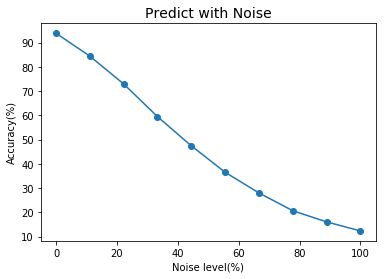

In [10]:
nn_hists = evaluate_acc(nn)
plt.plot(np.linspace(0,100,num=10),nn_hists[:,1]*100, "-o")
plt.xlabel('Noise level(%)')
plt.ylabel('Accuracy(%)')
plt.title("Predict with Noise", fontsize=14)

Text(0.5, 1.0, 'Predict with Noise')

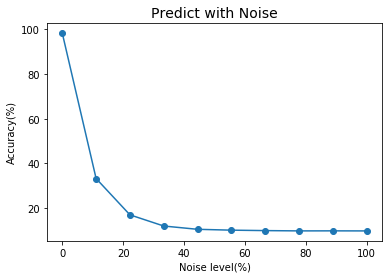

In [13]:
nn_bn_hists = evaluate_acc(nn_bn)
plt.plot(np.linspace(0,100,num=10),nn_bn_hists[:,1]*100, "-o")
plt.xlabel('Noise level(%)')
plt.ylabel('Accuracy(%)')
plt.title("Predict with Noise", fontsize=14)

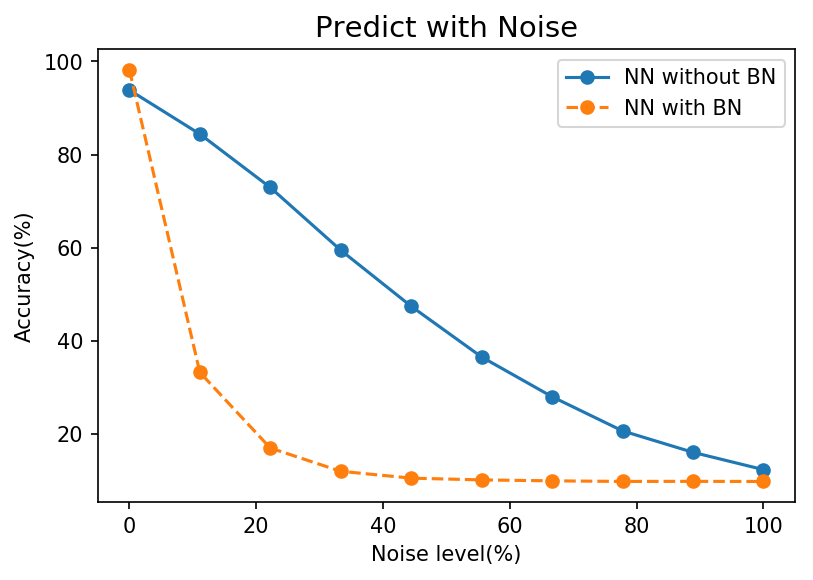

In [14]:
plt.figure(dpi=150)
plt.plot(np.linspace(0,100,num=10),nn_hists[:,1]*100, "-o", label = "NN without BN")
plt.plot(np.linspace(0,100,num=10),nn_bn_hists[:,1]*100, "--o", label = "NN with BN")
plt.xlabel('Noise level(%)')
plt.ylabel('Accuracy(%)')
plt.title("Predict with Noise", fontsize=14)
plt.legend()